In [1]:
import pandas as pd

data = pd.read_csv('data/raw/who_MDG_0000000007.csv', sep=',')

print(data.shape)
#print(data.head())
print(data.columns)

#data


(63070, 25)
Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'Dim1', 'TimeDim',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')


Under-five mortality rate (probability of dying by age 5 per 1000 live births)

In [2]:
interesting_variables = ['Id', 'IndicatorCode', 'SpatialDim', 'ParentLocationCode', 'TimeDim', 'NumericValue', 'Low', 'High']

# Ha bara med TimeDim mellan 2010 - 2019
data_filtered = data[(data['TimeDim'] >= 2010) & (data['TimeDim'] <= 2019)]

# Välj endast kolumnerna du är intresserad av
data_selected = data_filtered[interesting_variables]

# Visa de första raderna
print(data_selected.head())
print(data_selected.shape)



      Id   IndicatorCode SpatialDim ParentLocationCode  TimeDim  NumericValue  \
1    751  MDG_0000000007        SLV                AMR     2017      9.177681   
5   1646  MDG_0000000007        MOZ                AFR     2011     93.342799   
16  3542  MDG_0000000007        ARE                EMR     2019      6.304520   
19  4049  MDG_0000000007        TJK                EUR     2010     29.290261   
20  4740  MDG_0000000007        NAM                AFR     2018     54.773650   

          Low        High  
1    5.841837   14.255143  
5   83.961474  103.001956  
16   5.924501    6.708091  
19  23.903977   35.537795  
20  44.272768   67.097947  
(12770, 8)


ParentLocationCode → bäst för geografiska skillnader.

TimeDim → bäst för tidsmässiga mönster.

Egenkategori (“MortalityLevel”) → bäst för att se samband mellan indikatorns nivå och andra variabler.

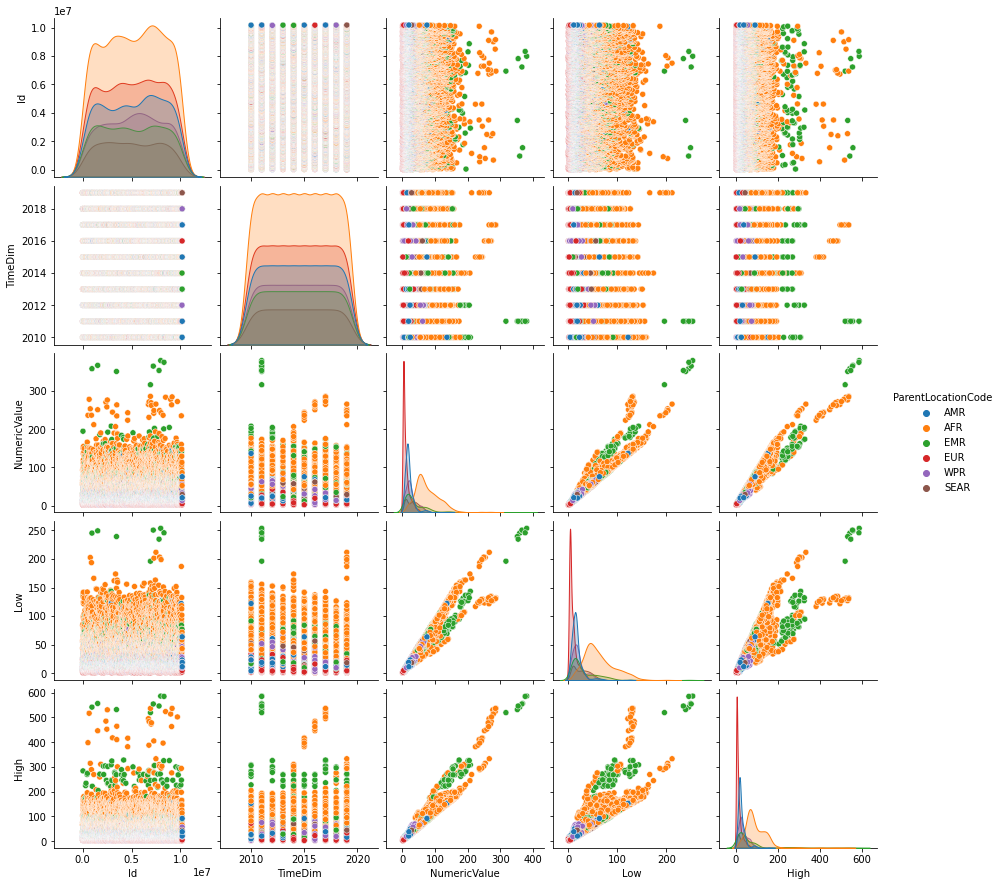

In [3]:
import seaborn as sns
sns.pairplot(data_selected, hue='ParentLocationCode')

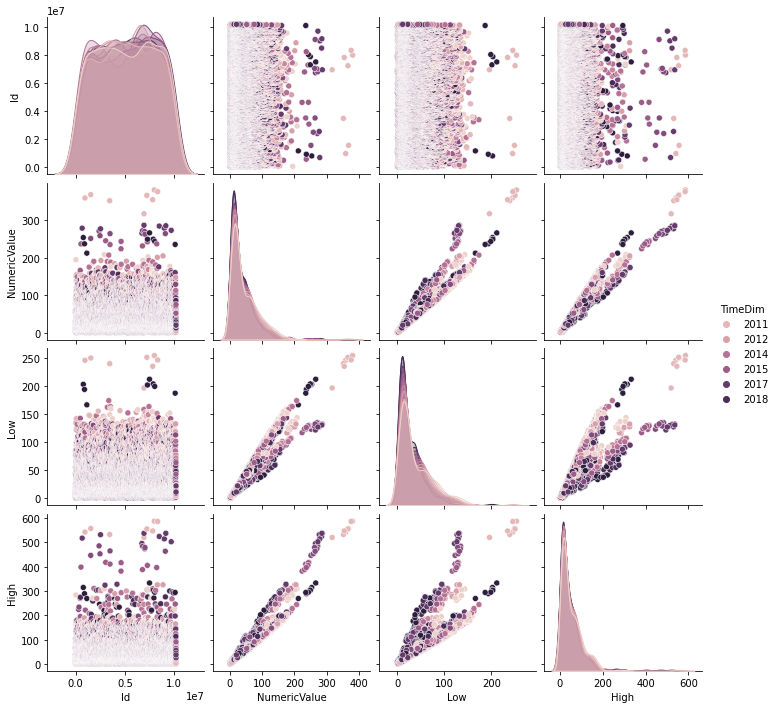

In [4]:

sns.pairplot(data_selected, hue='TimeDim')

<ipython-input-5-73c5861ba53a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected["MortalityLevel"] = pd.cut(


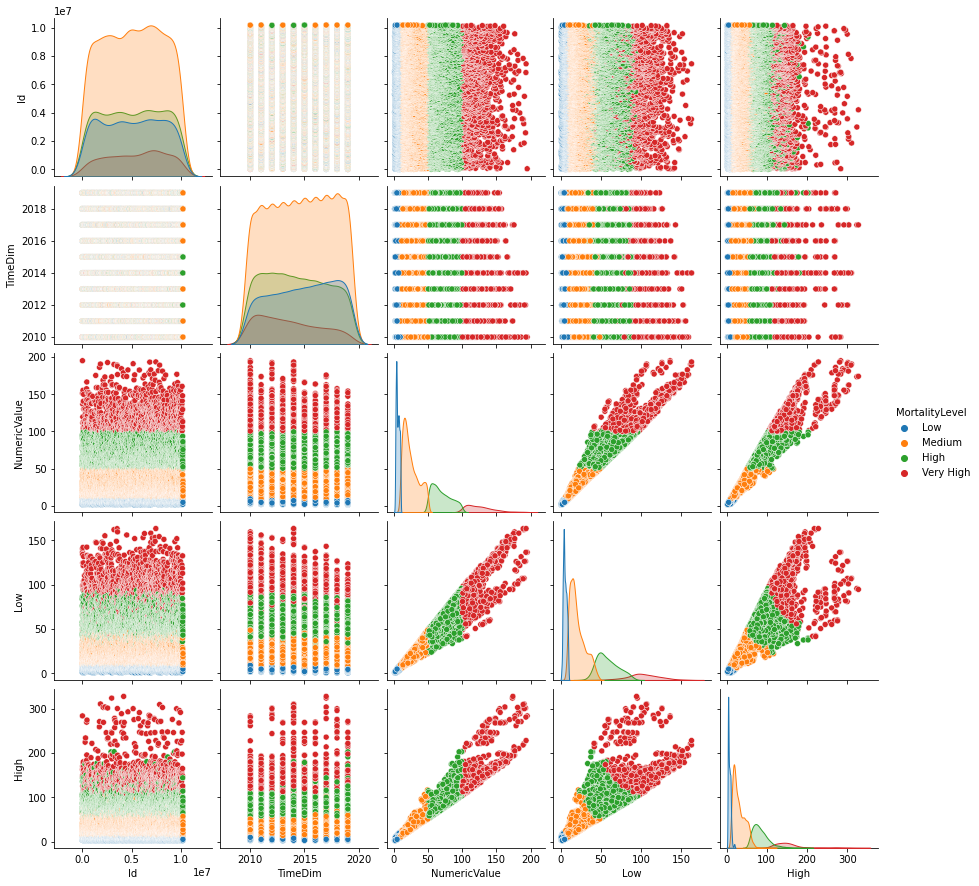

In [5]:
# Ger en tydligare färgskala: länder med låg, medelhög eller hög dödlighet. se korrelationer med “nivå” istället för region.
data_selected["MortalityLevel"] = pd.cut(
    data_selected["NumericValue"],
    bins=[0, 10, 50, 100, 200],
    labels=["Low", "Medium", "High", "Very High"]
)
sns.pairplot(data_selected, hue="MortalityLevel")



In [6]:
# Tänker att jag inte ska ha med detta - visar bara på där det är hög barnadödlighet och låg?
import numpy as np
import scipy.stats as stats

# Beräkna z-scores för NumericValue
z_score = stats.zscore(data_selected["NumericValue"])  # 1D-array

# Mask för outliers
outlier_mask = np.abs(z_score) > 3

# Filtrera ut outliers
outliers = data_selected[outlier_mask]

print(outliers.head())
print("Antal outliers:", outliers.shape[0])



          Id   IndicatorCode SpatialDim ParentLocationCode  TimeDim  \
191    32084  MDG_0000000007        SOM                EMR     2010   
524    84880  MDG_0000000007        SLE                AFR     2011   
2843  451940  MDG_0000000007        SOM                EMR     2014   
2936  469315  MDG_0000000007        NGA                AFR     2015   
3352  543737  MDG_0000000007        SSD                AFR     2015   

      NumericValue         Low        High MortalityLevel  
191     194.805049  136.429790  283.761932      Very High  
524     155.104099  141.857256  169.654068      Very High  
2843    157.210603   95.357636  269.555878      Very High  
2936    166.262493  142.195230  195.538746      Very High  
3352    236.526579  125.380655  397.857635            NaN  
Antal outliers: 135
